 Use Shopping dataset of Q1 and perform the agglomerative clustering using “complete” linkage. Evaluate the quality of clusters formed by agglomerative clustering and compare the results with the clusters obtained in Q1.


In [1]:
#importing shopping dataset
import pandas as pd 
import matplotlib.pyplot as plt 
shoppingdf=pd.read_csv('https://raw.githubusercontent.com/kajalpanda1/DatasetRepository/master/Shopping_Dataset.csv') 

In [2]:
shoppingdf.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#checking for NULL values
shoppingdf.isnull().sum().sort_values(ascending=False)

Spending Score (1-100)    0
Annual Income (k$)        0
Age                       0
Genre                     0
CustomerID                0
dtype: int64

In [4]:
#handling categorical values
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder() 
shoppingdf['Genre']=le.fit_transform(shoppingdf['Genre'])  

In [5]:
#extracting feature columns from dataset
shoppingdf1=shoppingdf.iloc[:,3:5].values

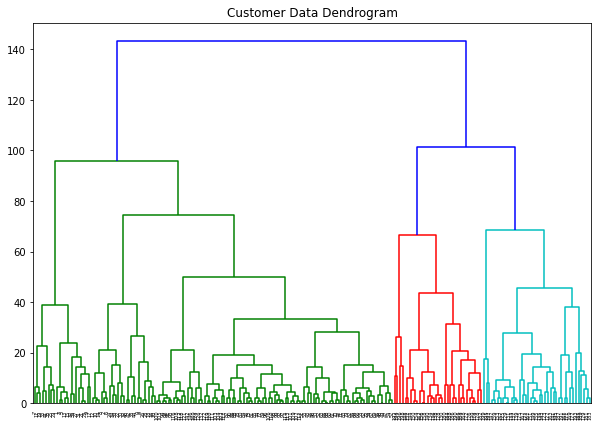

In [6]:
#plotting dendrogran with complete linkage
import scipy.cluster.hierarchy as shc 
plt.figure(figsize=(10,7)) 
plt.title("Customer Data Dendrogram") 
dend=shc.dendrogram(shc.linkage(shoppingdf1,method='complete')) 

In [7]:
#implementing agglomerative clustering
from sklearn.cluster import AgglomerativeClustering 
cluster=AgglomerativeClustering(n_clusters=5,linkage='complete') 
cluster.fit(shoppingdf1) 
labels=cluster.labels_ 

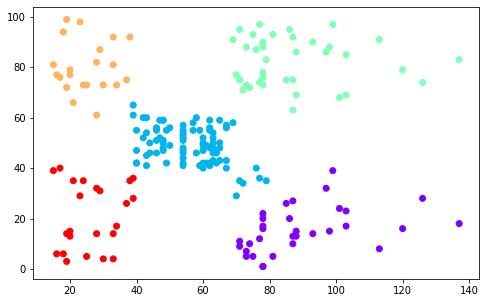

In [8]:
#forming the clusters
cluster=AgglomerativeClustering(n_clusters=5) 
plt.figure(figsize=(8, 5)) 
plt.scatter(shoppingdf1[:,0], shoppingdf1[:,1], c=cluster.fit_predict(shoppingdf1), cmap='rainbow') 

In [9]:
#evaluating the quality of clusters formed
from sklearn.metrics import silhouette_score 
silhoutte_scr=silhouette_score(shoppingdf1,cluster.labels_) 
print("For n_clusters =",5, "\nAverage Silhoutte Score =", round(silhoutte_scr,4))

For n_clusters = 5 
Average Silhoutte Score = 0.553
